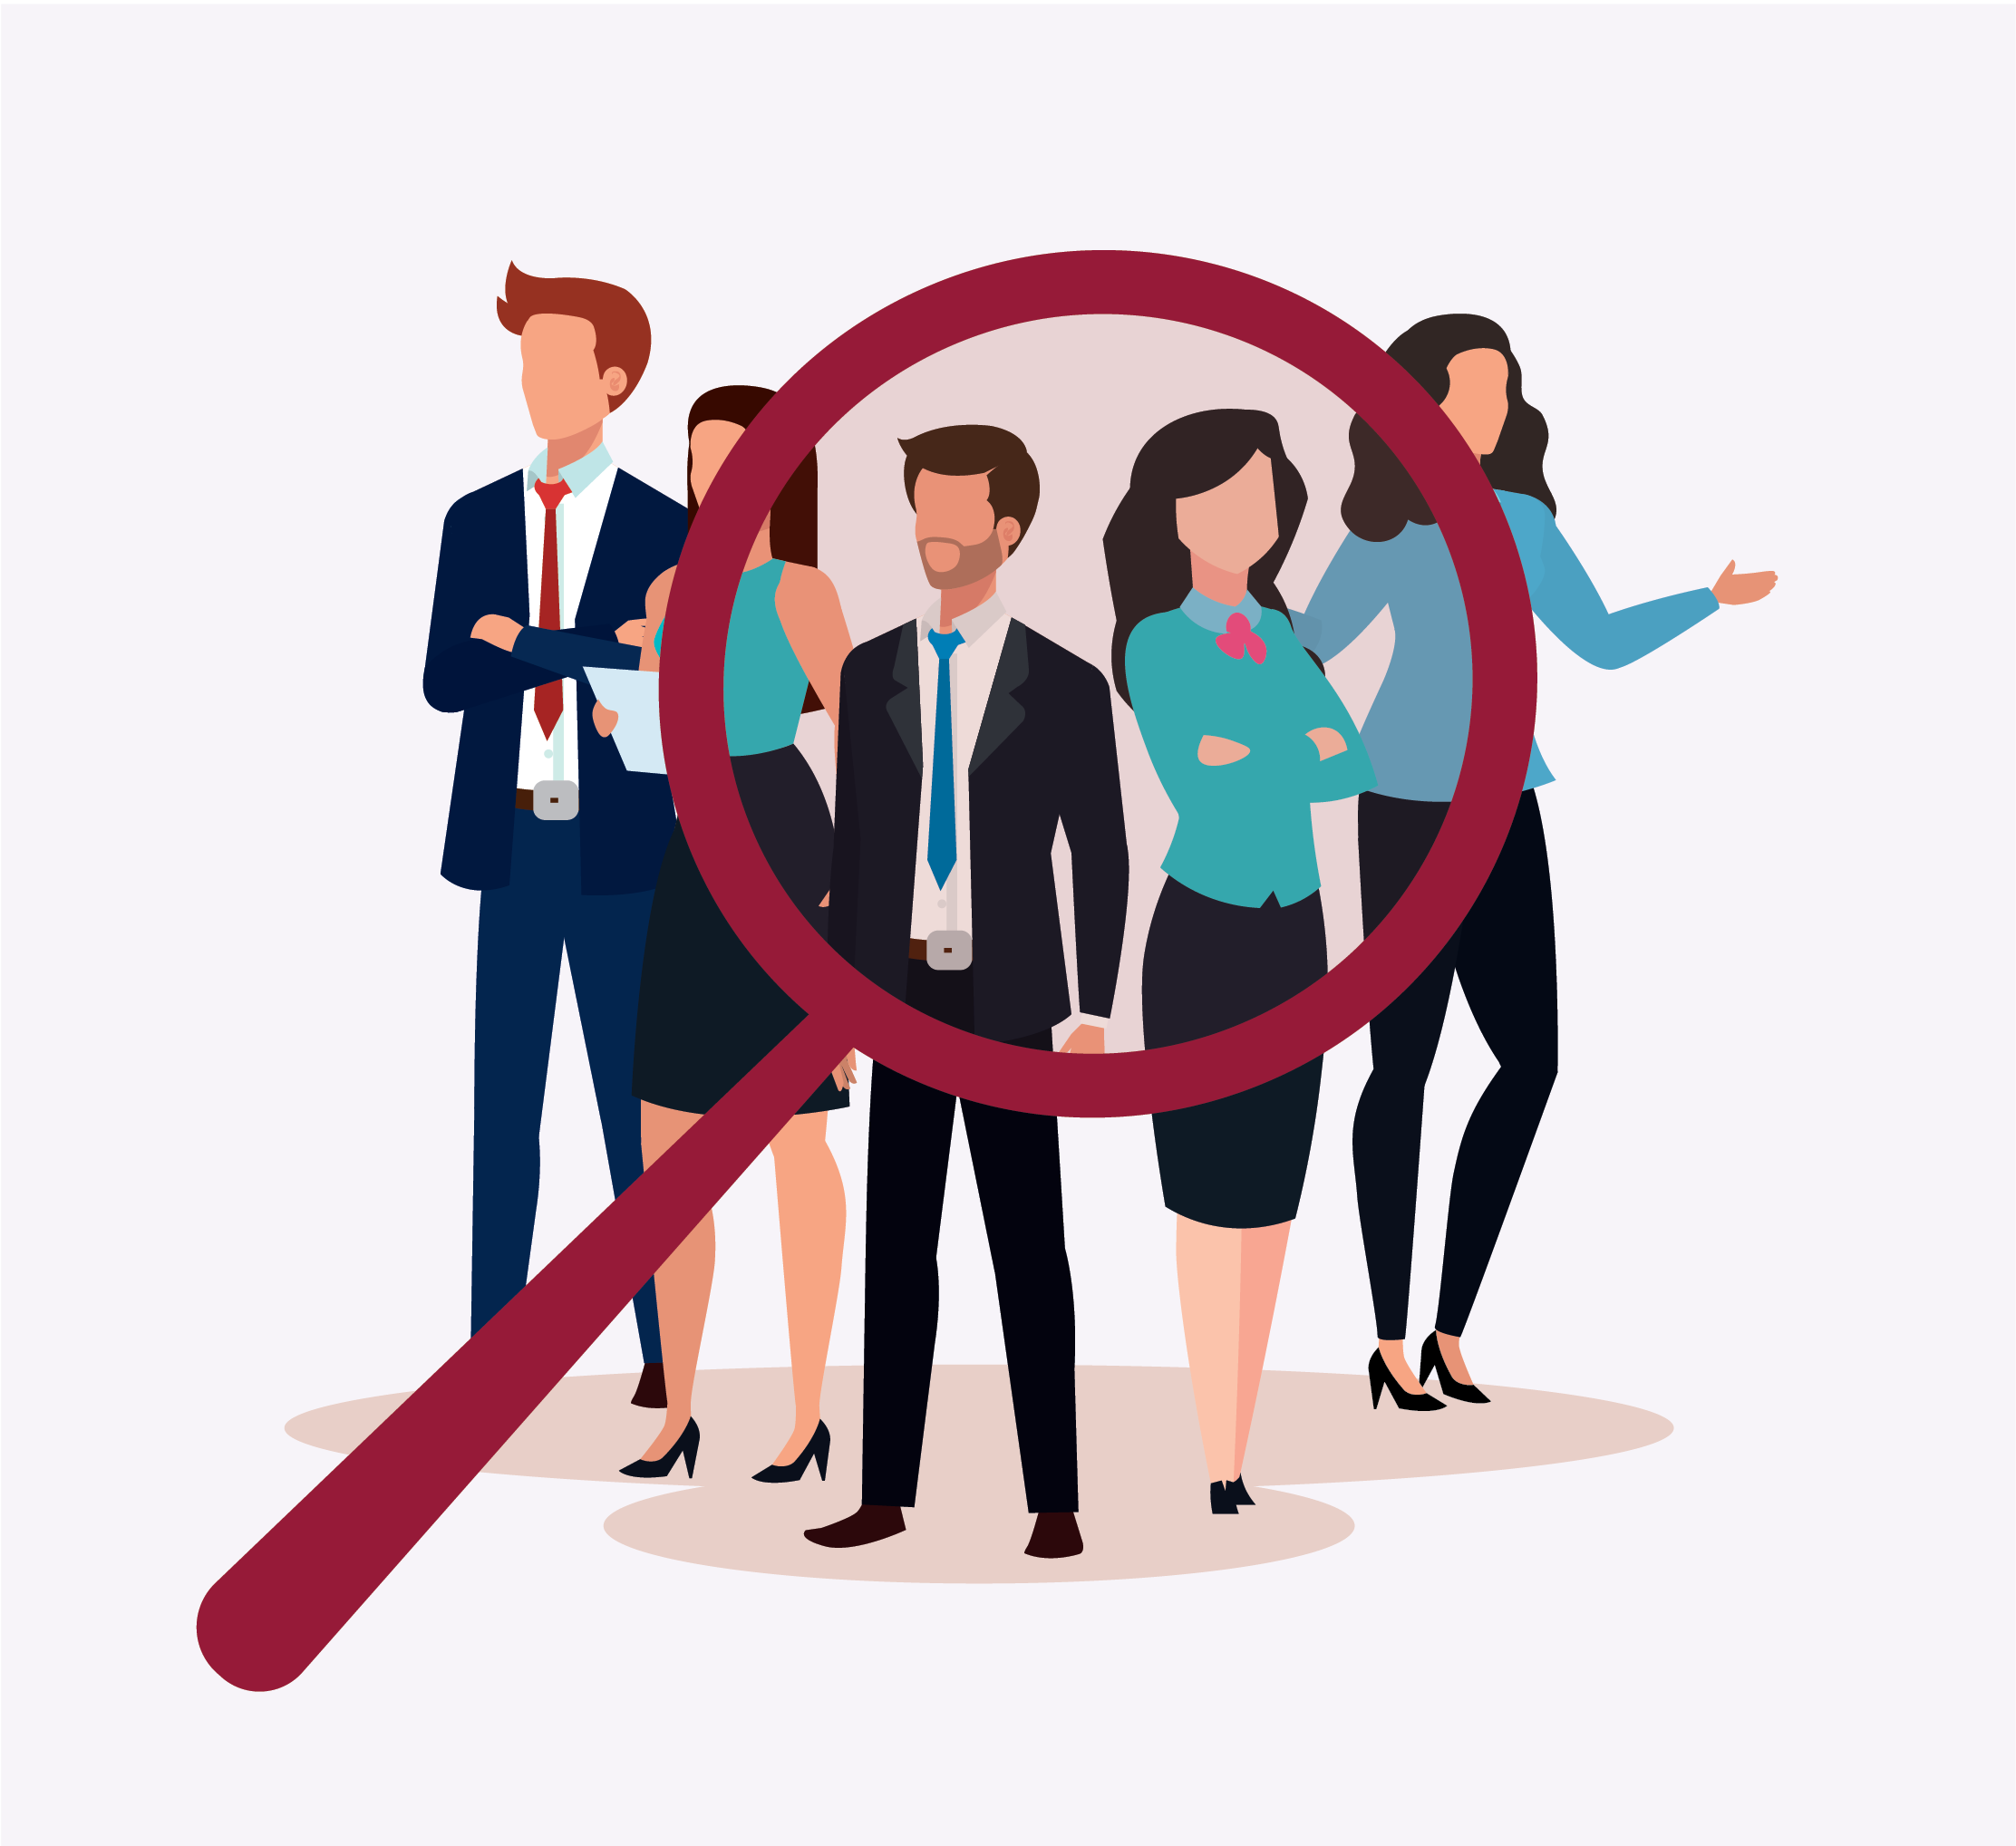

# **Employee Attrition Analysis**

**Attrition Effects:**
In todays world employee attrition really costs to any organization.Organisation puts effort in hiring,training and retaining its employees and it involves money and time for that organisation,but when a employee leaves all those effort losts and hamper the ongoing projects.When an employee leaves a job, the company surely loses some productivity. When the position of an ex-employee is vacant, the lost productivity affects the project deadlines and company revenue.

When an employee quits,with him his knowledge also goes away. That’s why it is important for any organisation to do some anlysis why and how they can put efforts in retaining their valuable employees rather than hire new one, invest money and time in training them while a critical project is going on.Adopting well-planned retention strategies, increasing employee satisfaction and consistently acknowledging employee accomplishments are few ways to promote employee engagement and control employee attrition rate.

The Aim of this analysis to study all those features which could result into employee attrition for any Organization.

**About Dataset:**
It is a fictional data set created by IBM Data scientists. This dataset is about 1470 rows and 32 attributes which consist of 15 categorical variables and 17 numerical variables.

In [1]:
#loading the libraries


library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#loading employee attrition data

employee_df <- read_csv("../input/emolyee-attrition/employee_attriation_new.csv")

#Visualising Dataset
view(employee_df)
str(employee_df)


Rows: 1470 Columns: 32

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Attrition, BusinessTravel, Department, Gender, JobRole, MaritalSta...
dbl (17): Age, DistanceFromHome, JobInvolvement, JobLevel, JobSatisfaction, ...
lgl  (1): Date_of_termination


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



spec_tbl_df [1,470 × 32] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age                    : num [1:1470] 37 21 45 23 22 19 19 28 29 18 ...
 $ Attrition              : chr [1:1470] "Yes" "No" "No" "No" ...
 $ BusinessTravel         : chr [1:1470] "Travel_Rarely" "Travel_Rarely" "Travel_Rarely" "Travel_Rarely" ...
 $ Department             : chr [1:1470] "Research & Development" "Research & Development" "Research & Development" "Sales" ...
 $ DistanceFromHome       : num [1:1470] 2 15 6 2 15 22 1 2 2 3 ...
 $ Gender                 : chr [1:1470] "Male" "Male" "Male" "Male" ...
 $ JobInvolvement         : num [1:1470] 2 3 3 3 3 3 1 3 2 3 ...
 $ JobLevel               : num [1:1470] 1 1 3 1 1 1 1 1 2 1 ...
 $ JobRole                : chr [1:1470] "Laboratory Technician" "Research Scientist" "Research Director" "Sales Representative" ...
 $ JobSatisfaction        : num [1:1470] 3 4 1 1 4 3 1 3 2 3 ...
 $ MaritalStatus          : chr [1:1470] "Single" "Single" "Married" "Divorced" ...
 $ M

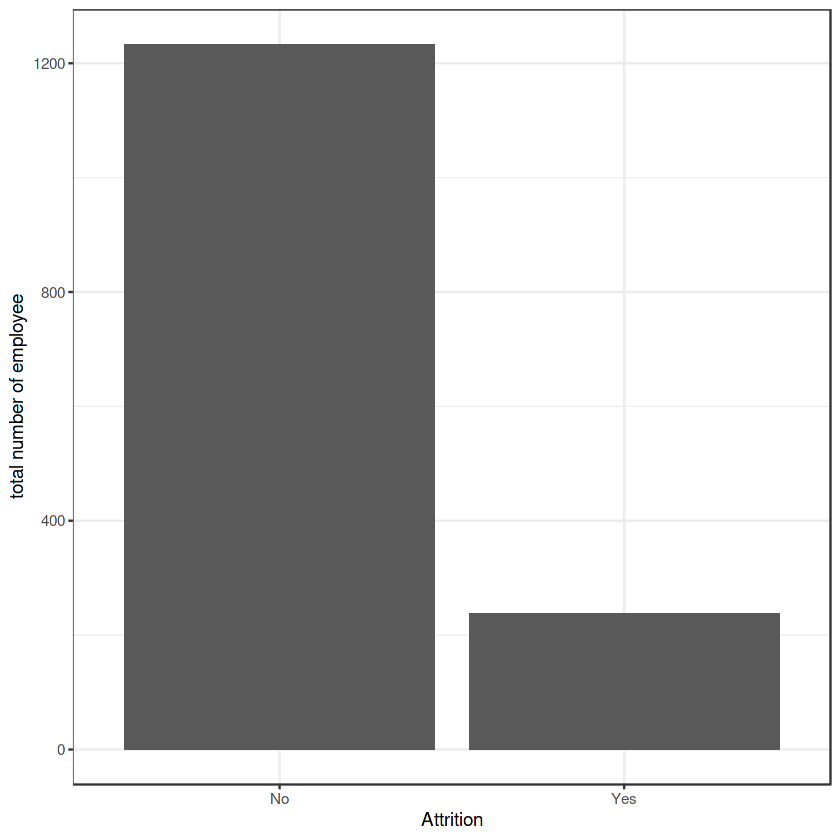

In [3]:
#Visualisation of Attrition to total number of employee

ggplot(employee_df,aes(x = Attrition))+
  theme_bw()+
  geom_bar()+
  labs(y = "total number of employee",x = "Attrition")


Attrition,n
<fct>,<int>
No,1233
Yes,237



       No       Yes 
0.8387755 0.1612245 

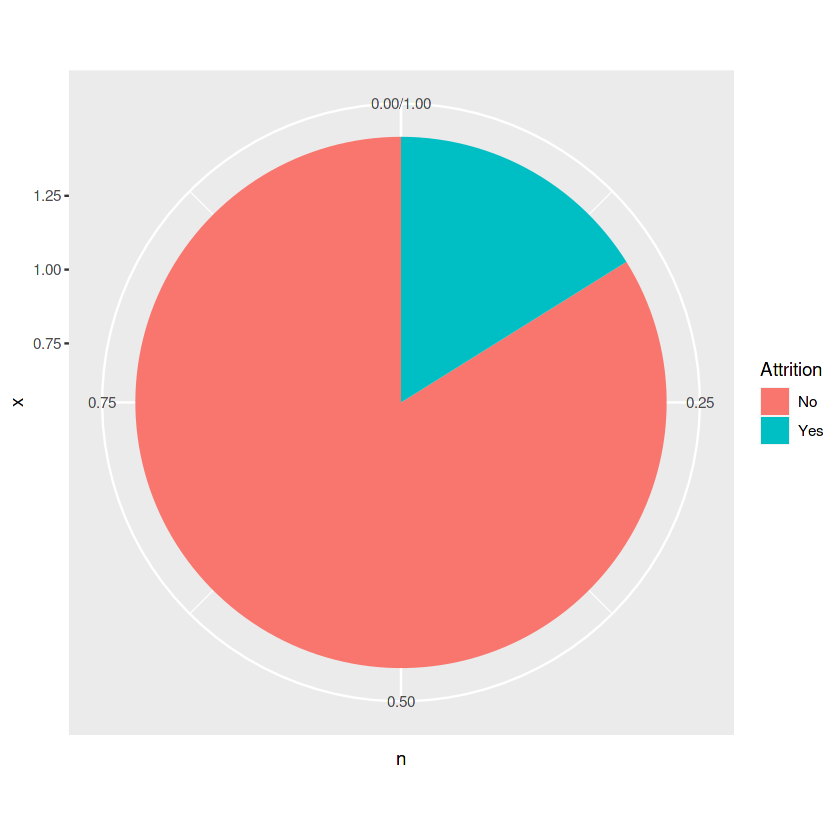

In [4]:
agg <- count(employee_df,Attrition)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum))
agg_mutate

pie_attrition <- ggplot(agg_mutate) +
      geom_col(aes(x = 1, y = n, fill = Attrition), position = "fill") +
      coord_polar(theta = "y") 
pie_attrition

#calculate percentages of Attrition(yes and no)

prop.table(table(employee_df$Attrition))



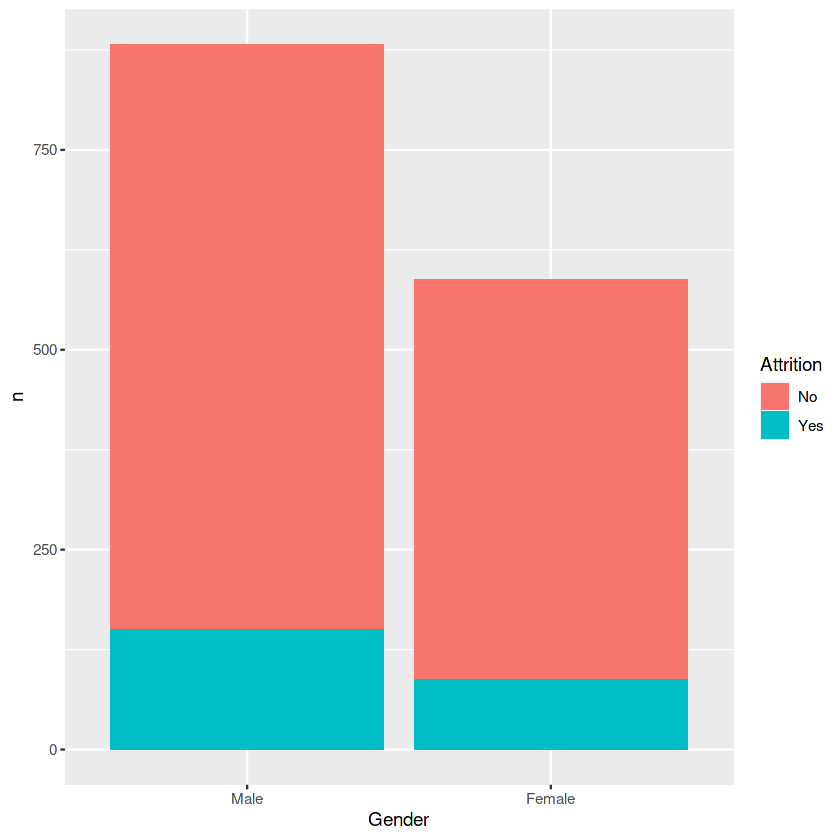

In [5]:
#visualising Attrition by Gender
agg <- count(employee_df,Attrition,Gender)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum),
                  Gender = reorder(Gender, -n, sum))
gen_attrition <- ggplot(agg_mutate) +
      geom_col(aes(x = Gender, y = n, fill = Attrition))

gen_attrition

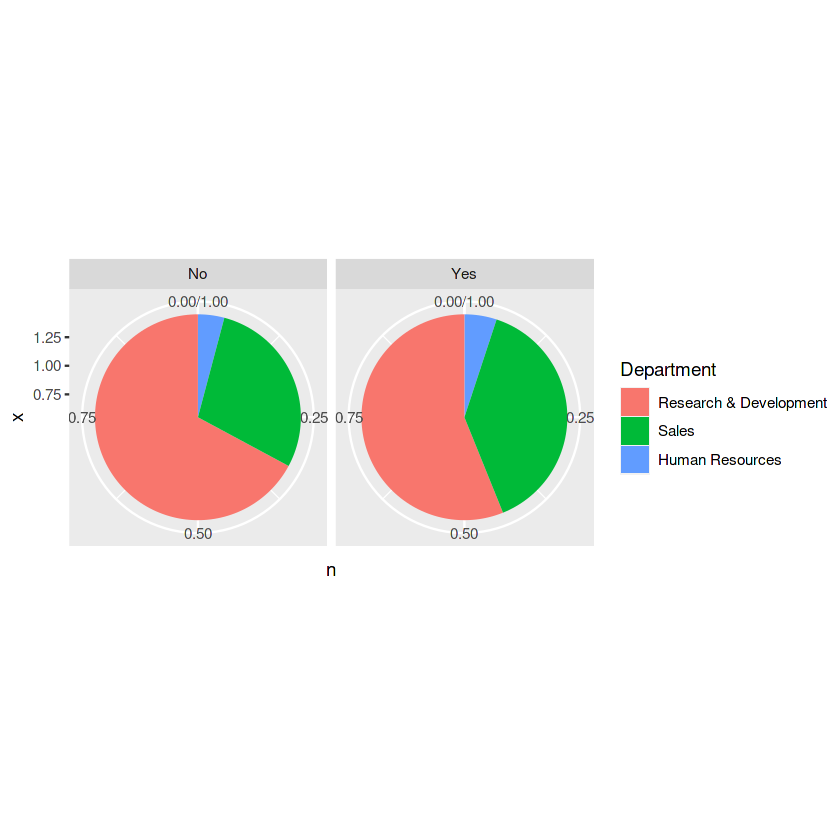

In [6]:
#Visualising Attrition by Department
agg <- count(employee_df,Attrition,Department)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum),
                  Department = reorder(Department, -n, sum))
                
attrition_department <- ggplot(agg_mutate) +
                        geom_col(aes(x = 1, y = n, fill = Department), position = "fill") +
                        coord_polar(theta = "y") +
                        facet_wrap(~Attrition)
attrition_department

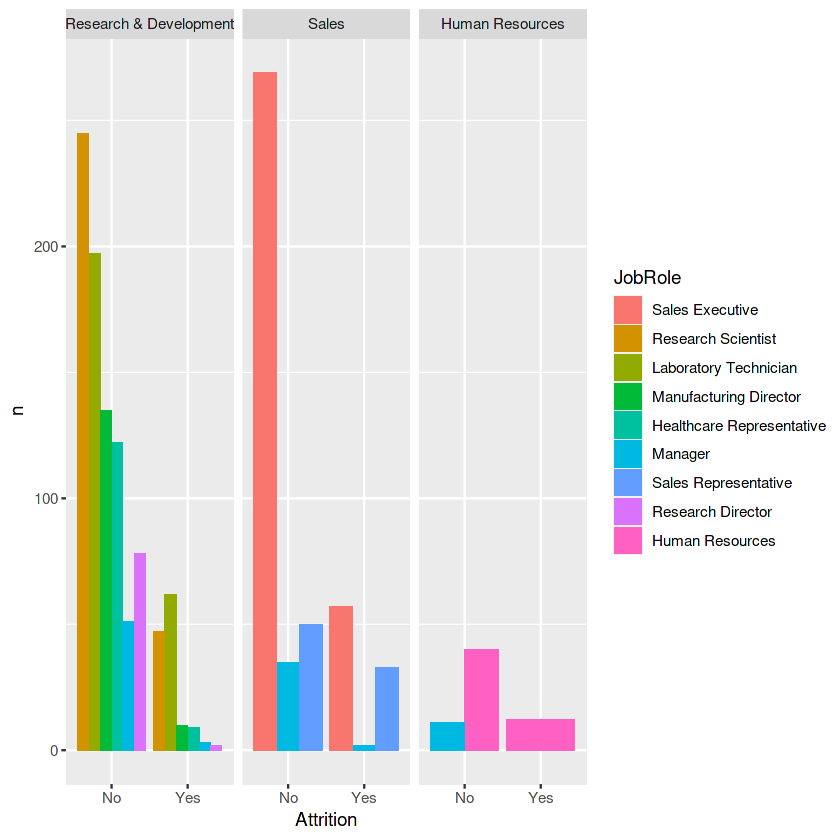

In [7]:
#Visualising Attrition by Department and JobRole
agg <- count(employee_df,Attrition,Department,JobRole)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum),
                  Department = reorder(Department, -n, sum),
                  JobRole = reorder(JobRole, -n, sum))
attrition_JobRole <- ggplot(agg_mutate) +
                        geom_col(aes(x = Attrition,y = n, fill = JobRole), position = "dodge")+
                        facet_wrap(~Department)
attrition_JobRole

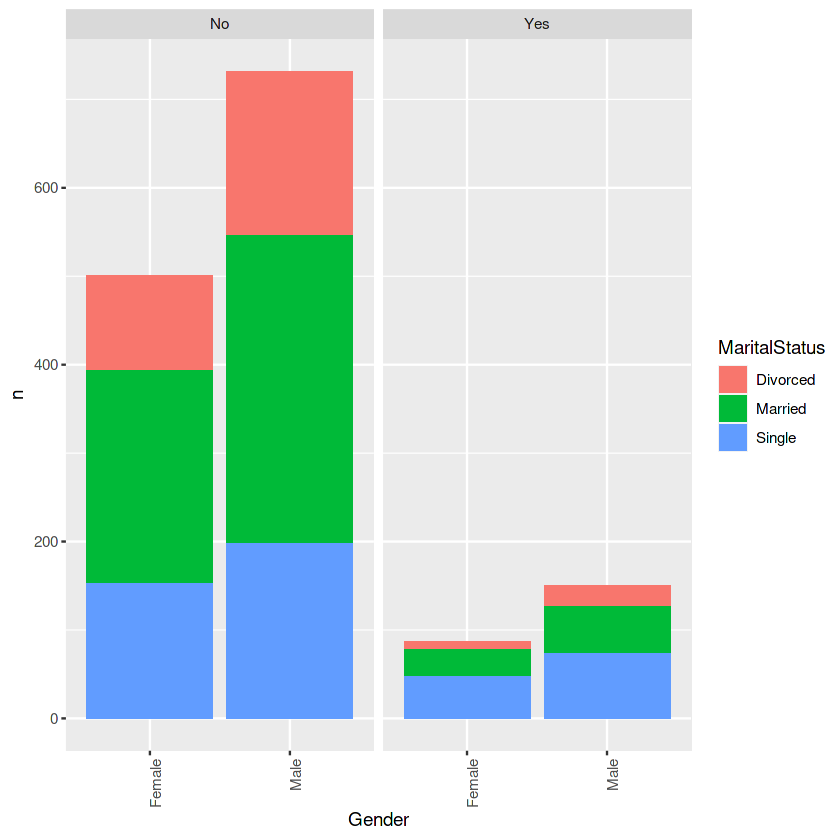

In [8]:
#Attrition by Marital Status and Gender

agg <- count(employee_df,Attrition,Gender,MaritalStatus)
ggplot(data = agg)+
  geom_col(aes(x = Gender,y = n,fill = MaritalStatus))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
   facet_wrap(~Attrition)

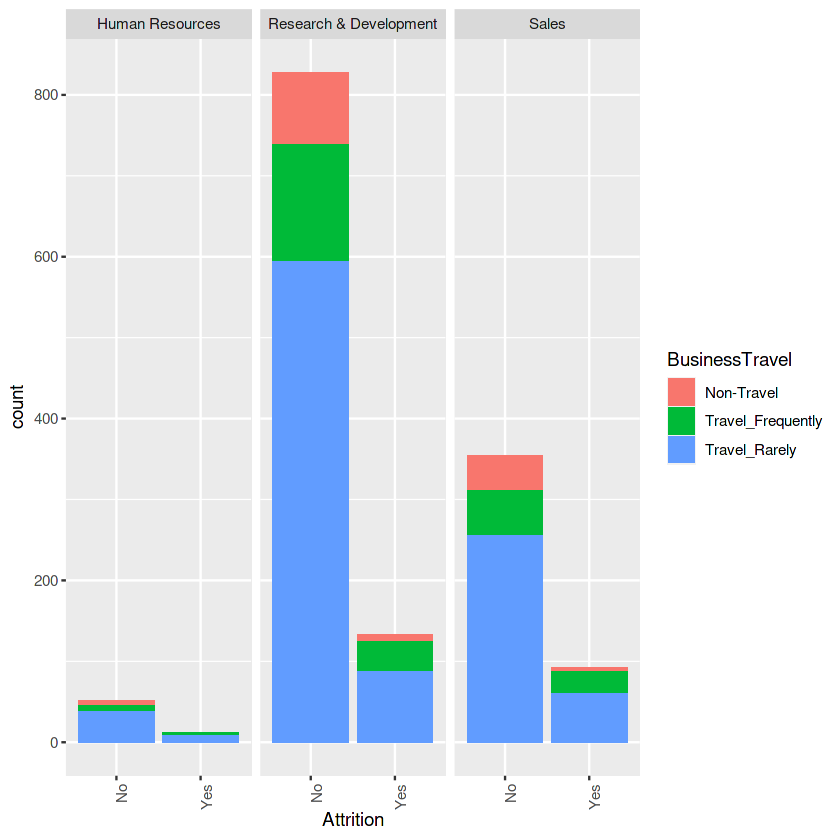

In [9]:
#Attrition by By Business Travel and Department

ggplot(employee_df, aes(x= Attrition,fill = BusinessTravel )) + 
  geom_bar()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~Department)


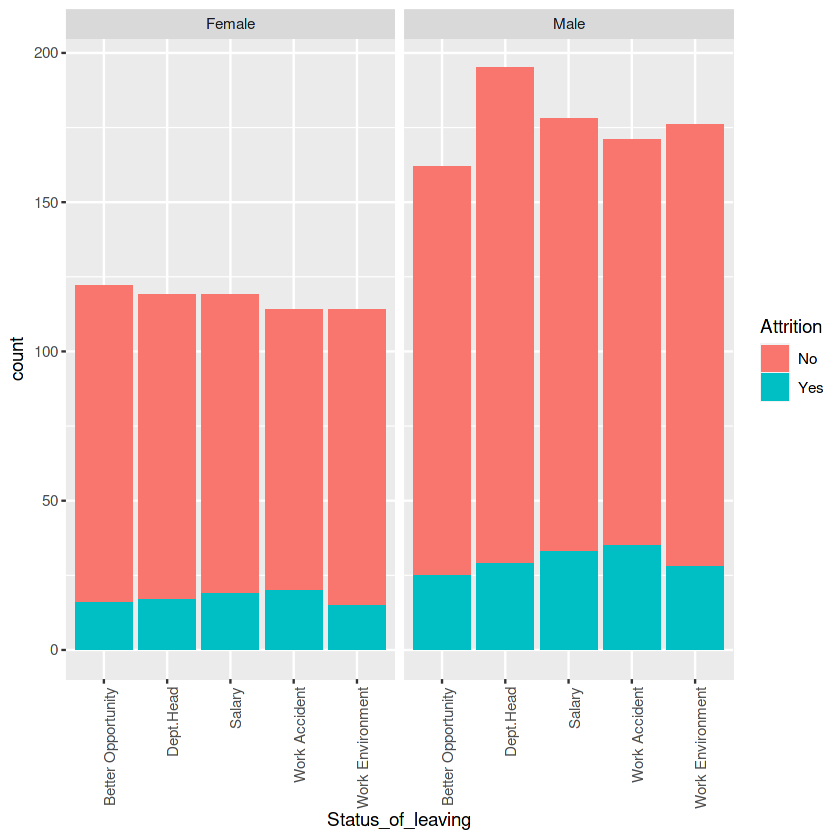

In [10]:
#Attrition by status of leaving 


ggplot(data = employee_df,aes(x = Status_of_leaving ,fill = Attrition))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  facet_wrap(~Gender)+
  geom_bar()

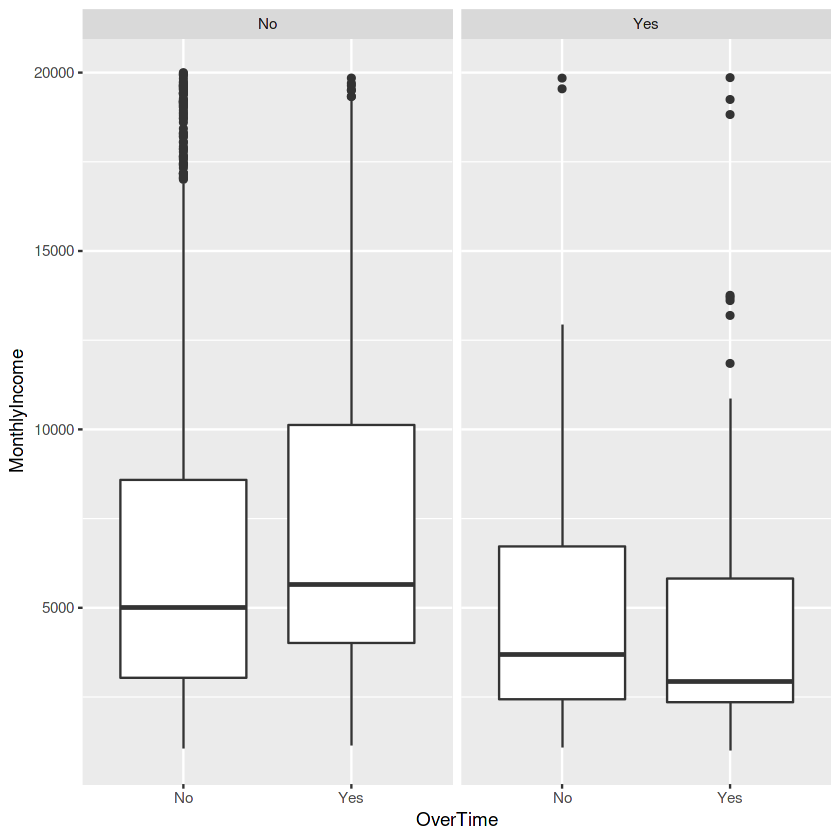

In [11]:
#Attrition by Monthly income and Overtime

ggplot(employee_df, aes(x=OverTime, y=MonthlyIncome)) + 
  geom_boxplot()+
  facet_wrap(~Attrition)


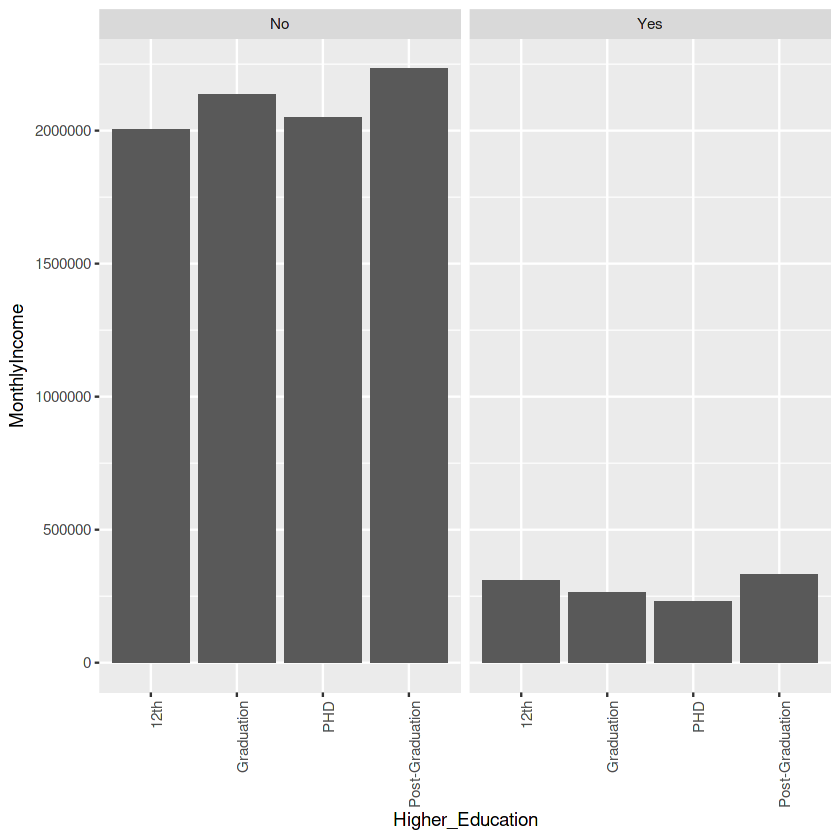

In [12]:

#Attrition by Higher Education and Monthly Income

ggplot(data = employee_df,aes(x = Higher_Education ,y = MonthlyIncome,Attrition))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  facet_wrap(~Attrition)+
  geom_col()


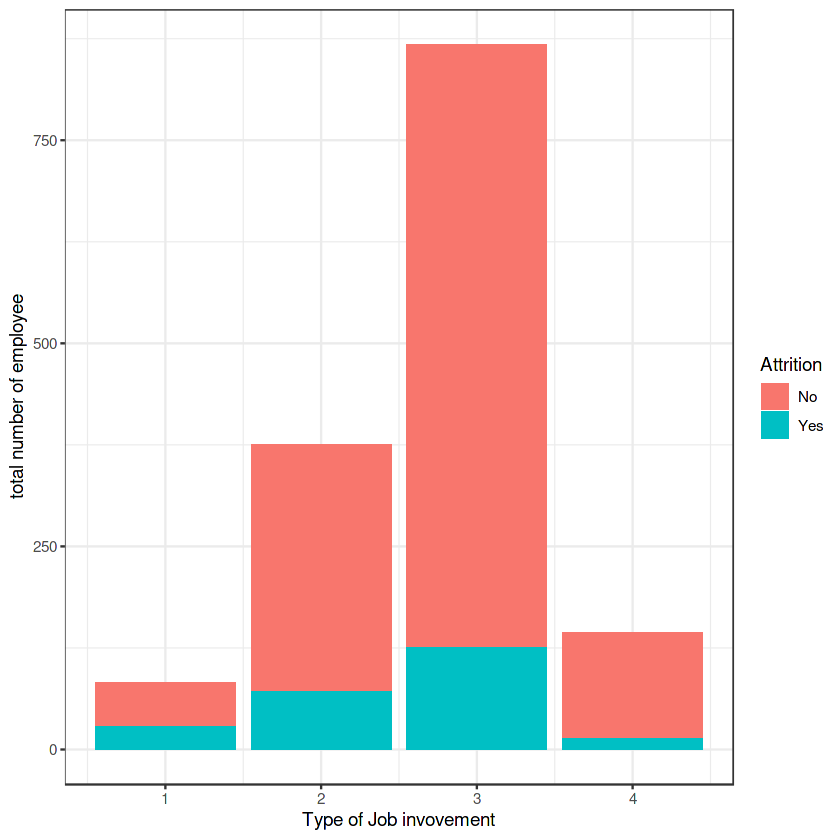

In [13]:
#Visualisation of number Attrition to Job Involvement
ggplot(employee_df,aes(x = JobInvolvement,fill = Attrition))+
  theme_bw()+
  geom_bar()+
  
  labs(y = "total number of employee",x = "Type of Job invovement")



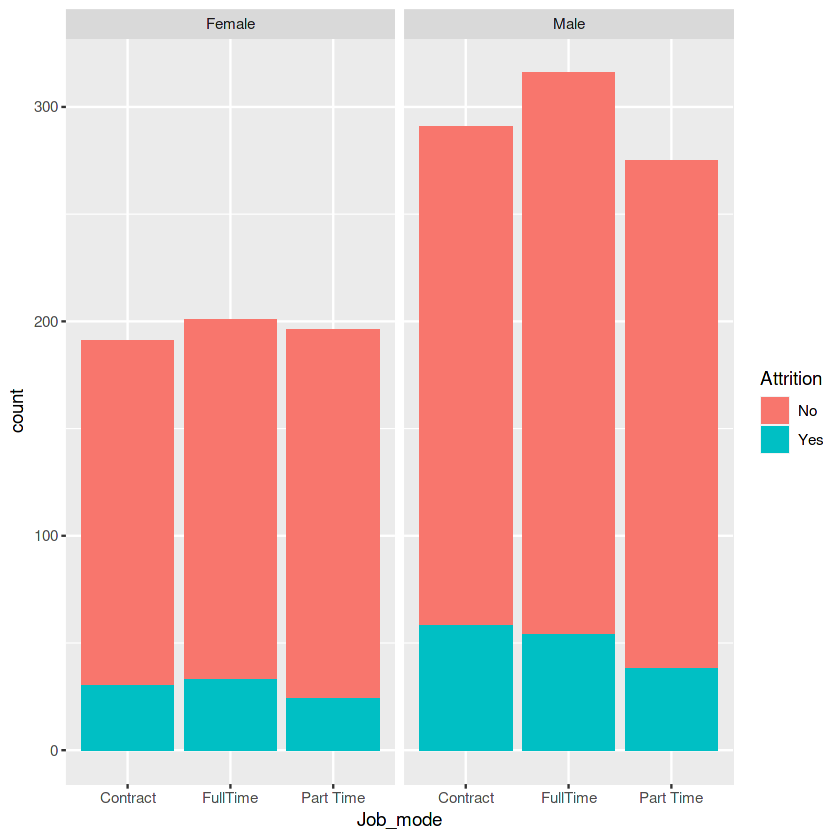

In [14]:

#Attrition by work Mode and Gender

ggplot(data = employee_df,aes(x = Job_mode ,fill = Attrition))+
  facet_wrap(~Gender)+
  geom_bar()

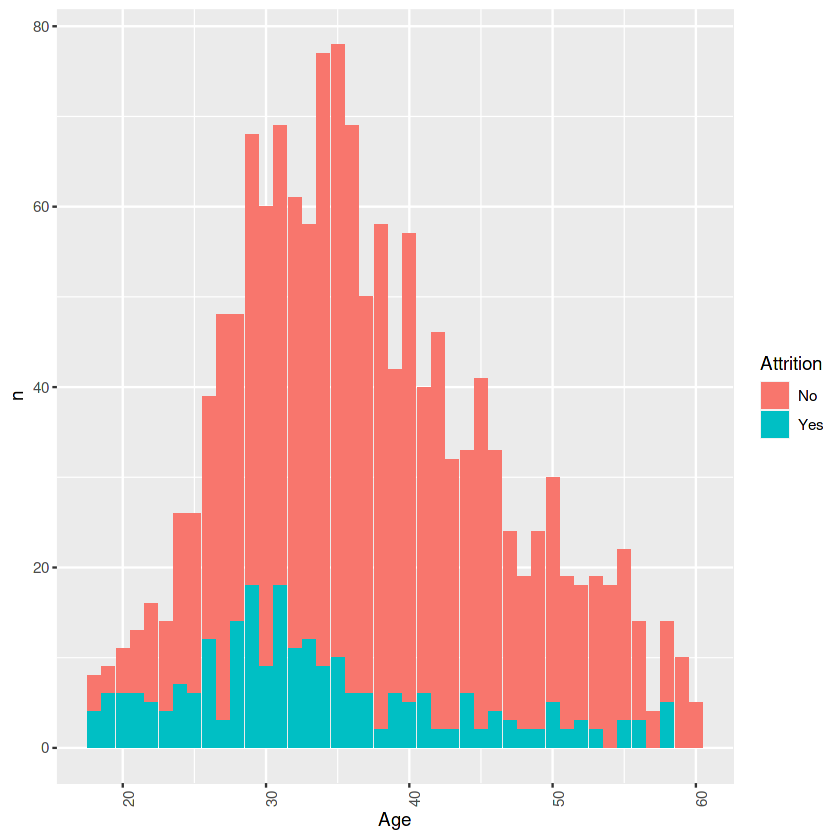

In [15]:
#visualising Attrition by Age
agg <- count(employee_df,Attrition,Age)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum))
                  
age_attrition <- ggplot(agg_mutate) +
      geom_col(aes(x = Age, y = n, fill = Attrition))+
 theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
 age_attrition

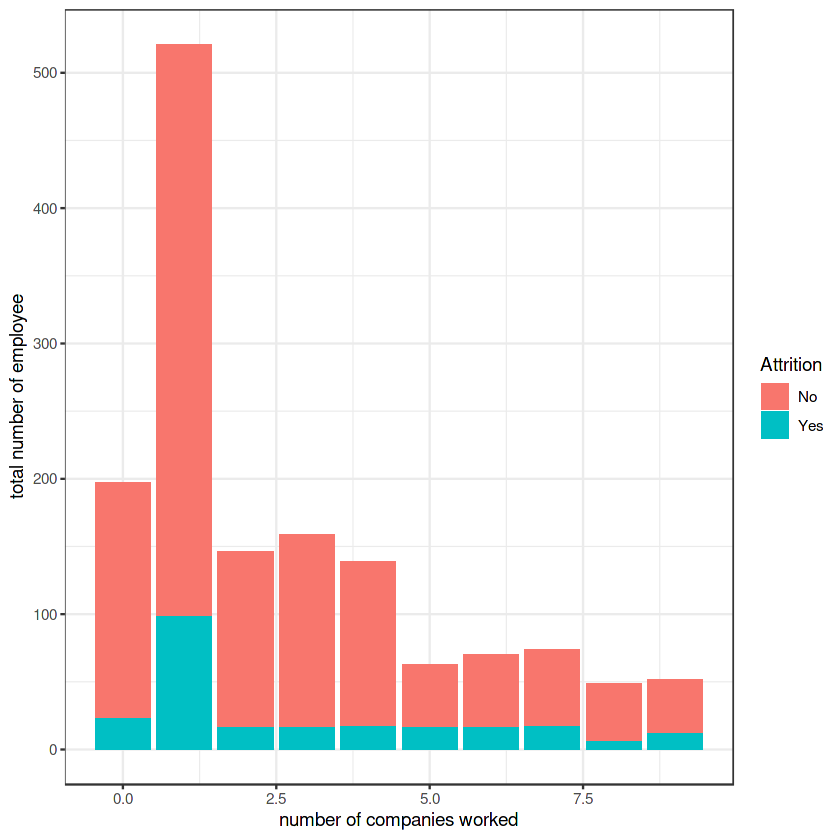

In [16]:
#Visualisation of Attrition to Number Of Companies worked
ggplot(employee_df,aes(x = NumCompaniesWorked,fill = Attrition))+
  theme_bw()+
  geom_bar()+
  
  labs(y = "total number of employee",x = "number of companies worked")



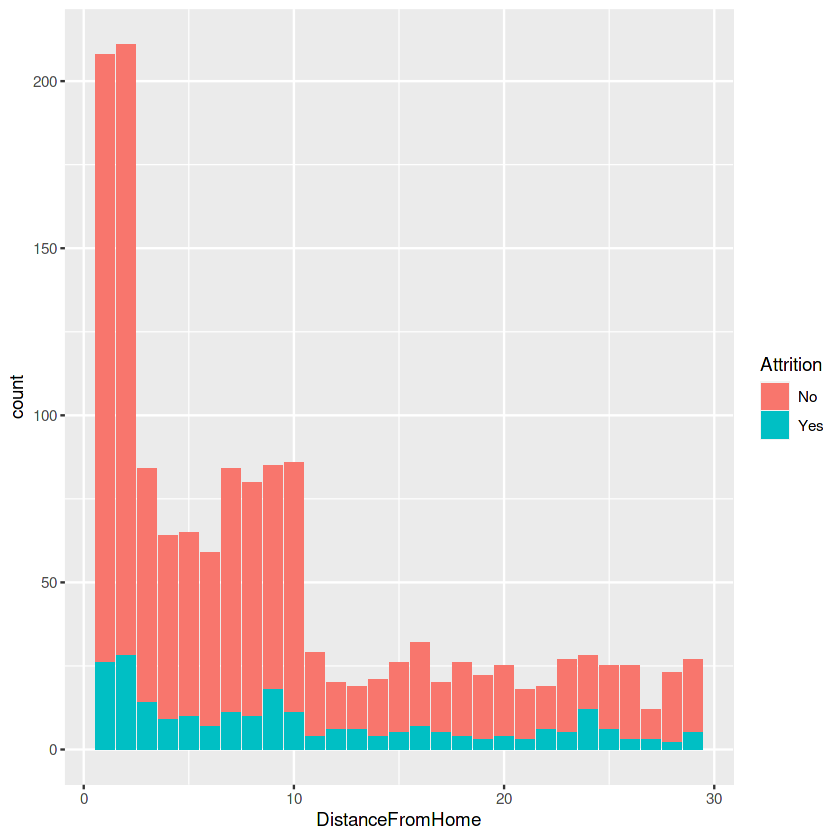

In [17]:
#Attrition by Diastance from  home

ggplot(employee_df,aes(x =DistanceFromHome,fill = Attrition))+
  geom_bar()


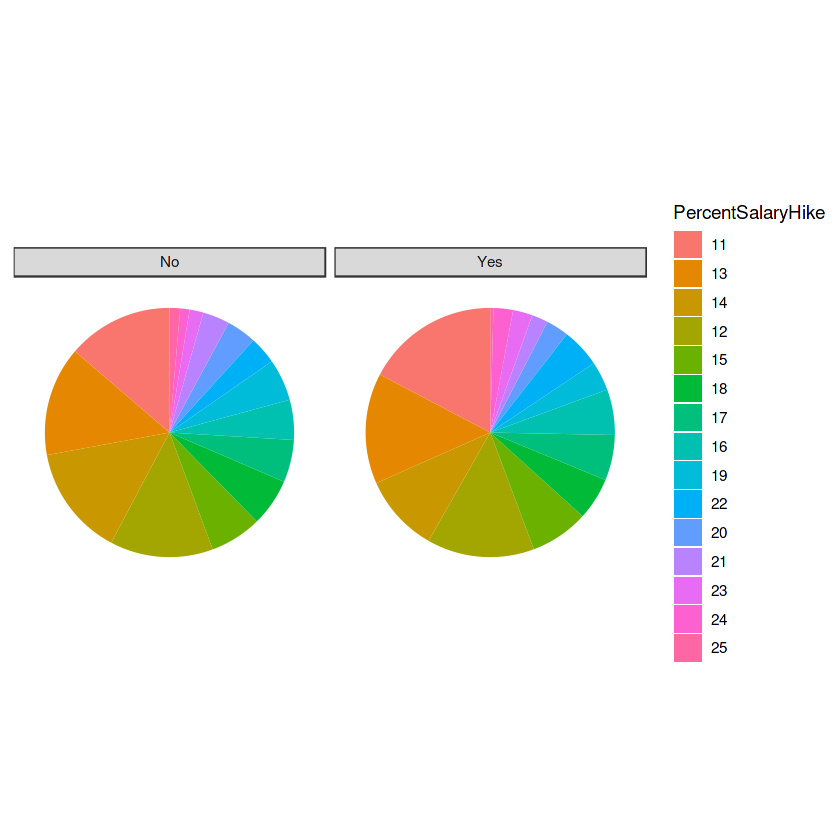

In [18]:
#Visualisation Of Attrition by Percent salary hike
agg <- count(employee_df,Attrition,PercentSalaryHike)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum),PercentSalaryHike = reorder(PercentSalaryHike, -n, sum))
            
p1 <- ggplot(agg_mutate) +
      geom_col(aes(x = 1, y = n, fill = PercentSalaryHike), position = "fill") +
      coord_polar(theta = "y")
p3 <- p1 + facet_wrap(~ Attrition) +
    theme_bw() +
    theme(axis.title = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank())
p3


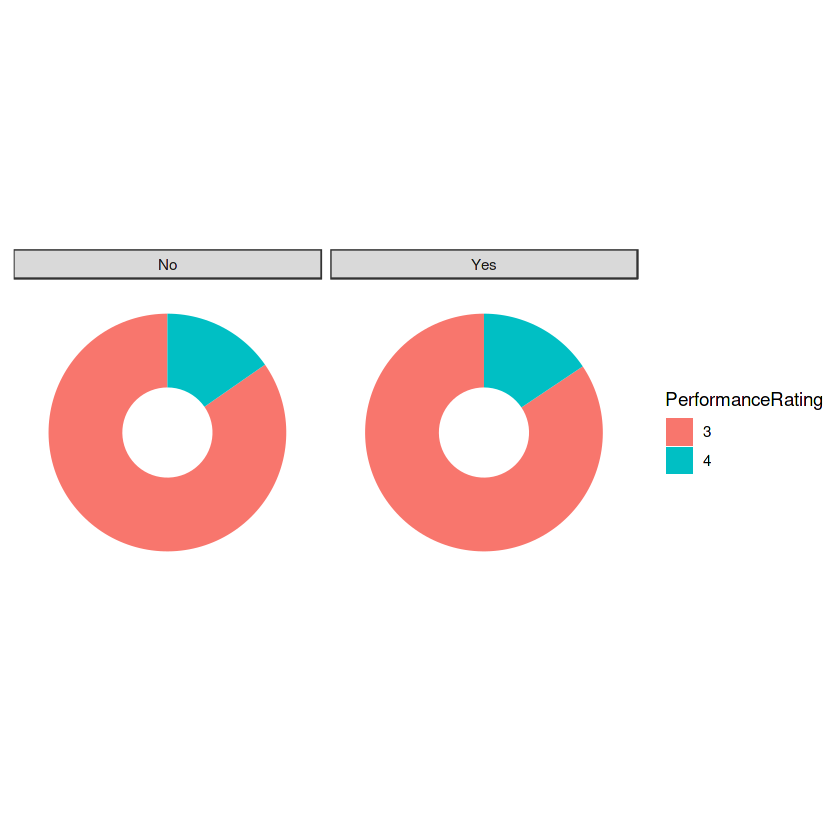

In [19]:
#Visualisation of Attrition By Performance Rating
agg <- count(employee_df,Attrition,PerformanceRating)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum),PerformanceRating = reorder(PerformanceRating, -n, sum))
            
p1 <- ggplot(agg_mutate) +
      geom_col(aes(x = 1, y = n, fill = PerformanceRating), position = "fill") +
      coord_polar(theta = "y")
p3 <- p1 + facet_wrap(~ Attrition) +
    theme_bw() +
    theme(axis.title = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank())

p4 <- p3 + xlim(0, 1.5)
p4



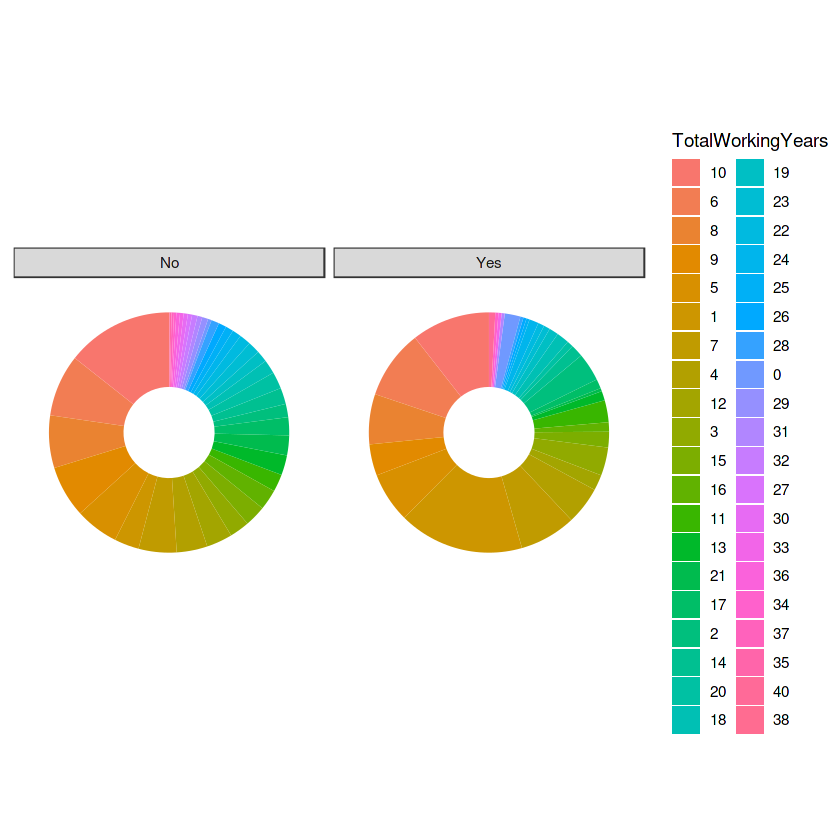

In [20]:
#Visualisation of Attrition by Total Working Years
agg <- count(employee_df,Attrition,TotalWorkingYears)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum),TotalWorkingYears = reorder(TotalWorkingYears, -n, sum))
            
p1 <- ggplot(agg_mutate) +
      geom_col(aes(x = 1, y = n, fill = TotalWorkingYears), position = "fill") +
      coord_polar(theta = "y")
p3 <- p1 + facet_wrap(~ Attrition) +
    theme_bw() +
    theme(axis.title = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank())
p4 <- p3 + xlim(0, 1.5)
p4


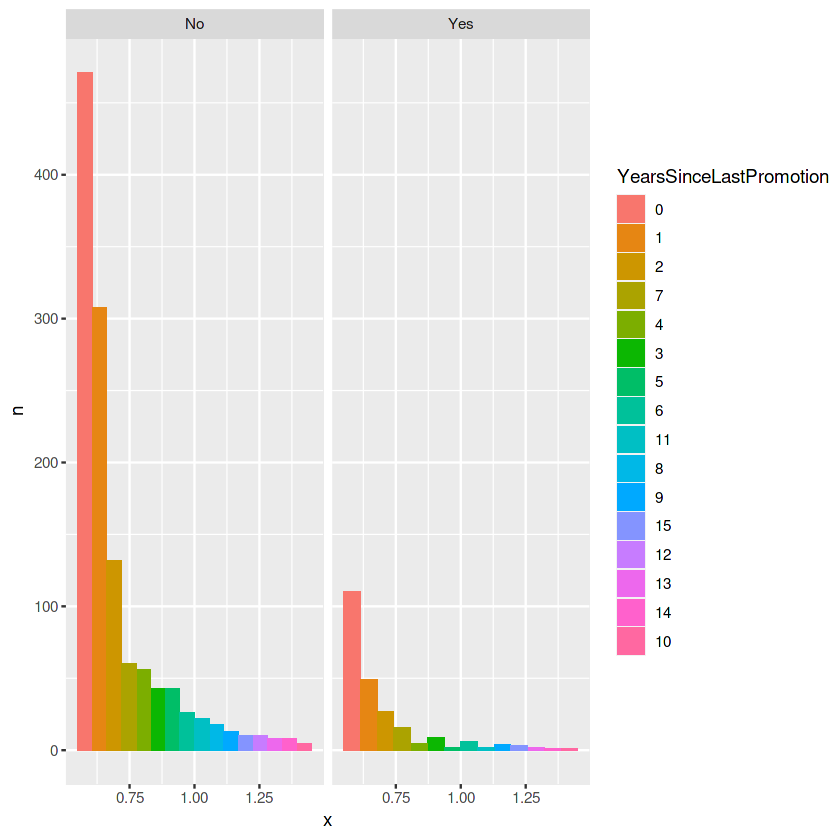

In [21]:
#Visualisation of Attrition By Years Since Last Promotion
agg <- count(employee_df,Attrition,YearsSinceLastPromotion)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum),YearsSinceLastPromotion = reorder(YearsSinceLastPromotion, -n, sum))
            
p1 <- ggplot(agg_mutate) +
      geom_col(aes(x = 1, y = n, fill = YearsSinceLastPromotion), position = "dodge")+
      facet_wrap(~Attrition)
p1

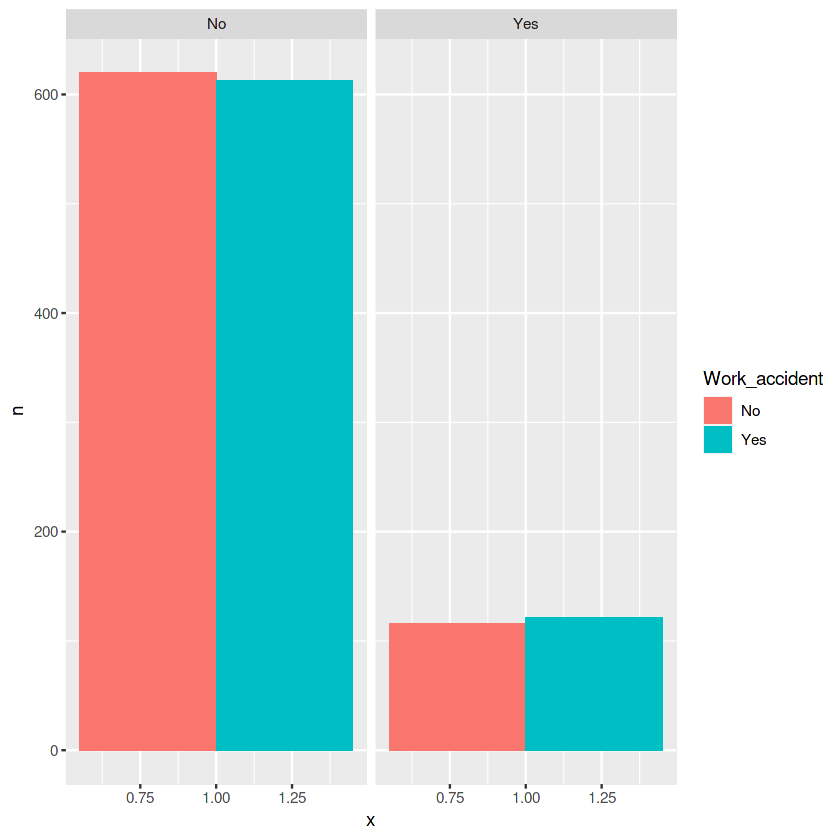

In [22]:
#Visualisation of Attrition By Work Accident
agg <- count(employee_df,Attrition,Work_accident)
agg_mutate <- mutate(agg,
                  Attrition = reorder(Attrition, -n, sum),Work_accident = reorder(Work_accident, -n, sum))
            
 p1 <- ggplot(agg_mutate) +
      geom_col(aes(x = 1, y = n, fill = Work_accident), position = "dodge")+
      facet_wrap(~Attrition)
p1 

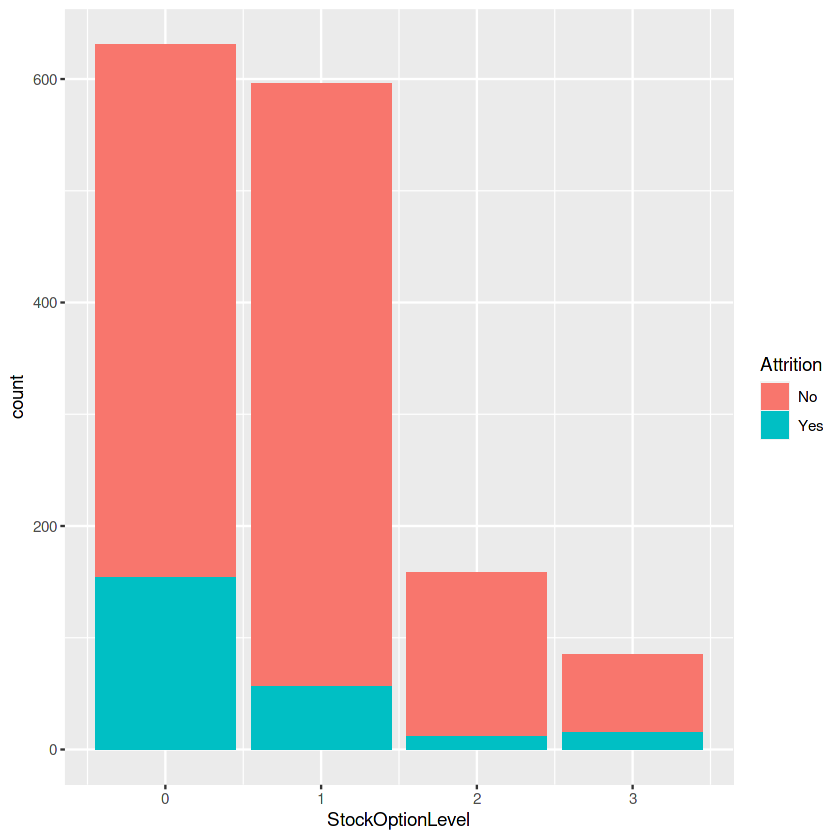

In [23]:
#Visualisation Of Attrition By Stock Option Level
ggplot(employee_df,aes(x = StockOptionLevel,fill = Attrition))+
  geom_bar()


From the Above Analysis we observe that important factor which effects Attrition and because of that Employee more likely to leave the Organisation are:

* **Gender**-Male employees are more likely to quit organisation than Female
* **Department**-Employee of Research & Developement department Quits more than other Department
* **Job Role**-Employees having Job Role of Laboratory Technician And Research Scientist of Research & Developement        department            and Sales Executive from Sales department
* **Marital Status**-Those employees who are single
* **Business travel** - The non-travellers from all departments
* **Over Time and Monthly Income**- Employees who do Overtime and having Monthly Income less than 7000
* **Job Involvement**-Type 3 and 2 are more likely to quit
* **Job Mode**- Contract and Full Time
* **Age-** Age group 25-35 years
* **Years Since Last Promotion**-Years Since Last Promotion from 0 to 1 years
* **Total Working Years**- less than 10 years
* ** Percent salary hike**-less than 12 percent
* **Stock Option Level**-Stock Option Level 0


